In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Outliers

In [2]:
df = pd.read_csv('bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

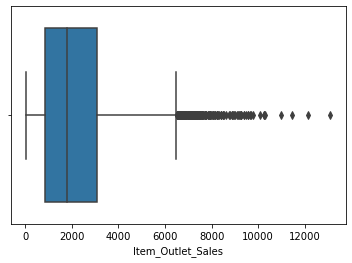

In [3]:
sns.boxplot(df['Item_Outlet_Sales'])

# Identify the Outliers

In [4]:
from scipy import stats

In [5]:
stats.zscore(df['Item_Outlet_Sales'])

0       0.910601
1      -1.018440
2      -0.049238
3      -0.849103
4      -0.695373
          ...   
8518    0.349915
8519   -0.956402
8520   -0.579100
8521   -0.196725
8522   -0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [6]:
z = np.abs(stats.zscore(df['Item_Outlet_Sales']))
z

0       0.910601
1       1.018440
2       0.049238
3       0.849103
4       0.695373
          ...   
8518    0.349915
8519    0.956402
8520    0.579100
8521    0.196725
8522    0.829594
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [7]:
z.describe()

count    8523.000000
mean        0.789130
std         0.614262
min         0.000075
25%         0.351431
50%         0.702246
75%         1.066432
max         6.391045
Name: Item_Outlet_Sales, dtype: float64

In [8]:
threshold = 3
outliers = np.where(z>threshold)
outliers

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
         809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
        2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
        3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
        4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
        5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
        6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
        7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
        8245, 8447], dtype=int64),)

In [9]:
o = outliers[0]
o

array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64)

In [10]:
z[4961]

4.3855286411391825

In [11]:
z[8447]

3.168562626821275

In [12]:
len(o) # i.e. 90 outliers are present in the Item_Outlet_Sales column

90

# Treatment of Outliers

In [13]:
o

array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
df['rowno'] = np.arange(len(df))
df_copy = df.copy()

In [19]:
df_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,rowno
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,3
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,4


### Either we can remove the outliers or clip the data (that means, we can replace the outliers with the max value of that particular column)
### We will remove the row which is having outliers

In [26]:
for i in o:
    df.drop(df[df['rowno']==i].index,inplace=True)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

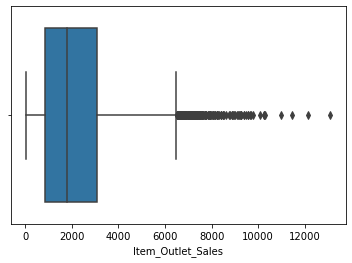

In [29]:
sns.boxplot(x=df_copy['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

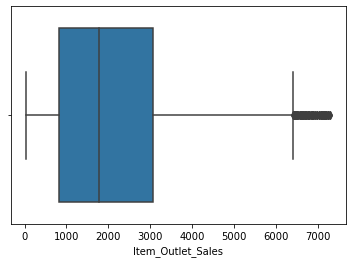

In [30]:
sns.boxplot(x=df['Item_Outlet_Sales'])

In [32]:
df['Item_Outlet_Sales'].describe()

count    8433.000000
mean     2114.297126
std      1582.783405
min        33.290000
25%       822.263000
50%      1768.364800
75%      3056.022000
max      7298.499600
Name: Item_Outlet_Sales, dtype: float64